<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week3/PMAQ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Used for PMA3.xlsx to Used for PMA3.xlsx


In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = pd.read_excel('Used for PMA3.xlsx', header=None) # 对于没有表头的数据
# 为每一列添加标题
data.columns = ['Computer_assisted learning', 'Group_based learning']
column1_data = data['Computer_assisted learning']
column2_data = data['Group_based learning']
print(data)

    Computer_assisted learning  Group_based learning
0                         19.4                  18.7
1                         20.7                  24.4
2                         21.8                  19.3
3                         14.4                  15.6
4                         16.1                  18.0
5                         16.8                  21.7
6                         14.7                  27.0
7                         16.7                  13.8
8                         19.3                  18.0
9                         16.8                  20.8
10                        17.7                  17.1
11                        19.8                  28.2


In [11]:
# Python code to perform a two-sample t-test

# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats


# Descriptive statistics
desc_stats_1 = {
    'Mean': np.mean(data['Computer_assisted learning']),
    'Variance': np.var(data['Computer_assisted learning'], ddof=1),
    'Observations': len(data['Computer_assisted learning'])
}

desc_stats_2 = {
    'Mean': np.mean(data['Group_based learning']),
    'Variance': np.var(data['Group_based learning'], ddof=1),
    'Observations': len(data['Group_based learning'])
}

# Perform two-sample t-test
t_stat, p_value_two_tail = stats.ttest_ind(data['Computer_assisted learning'], data['Group_based learning'], equal_var=True)
df = len(data['Computer_assisted learning']) + len(data['Group_based learning']) - 2
p_value_one_tail = p_value_two_tail / 2
pooled_variance = ((len(data['Computer_assisted learning']) - 1) * desc_stats_1['Variance'] + (len(data['Group_based learning']) - 1) * desc_stats_2['Variance']) / df

# t critical values for one-tail and two-tail
t_critical_one_tail = stats.t.ppf(1 - 0.05, df)
t_critical_two_tail = stats.t.ppf(1 - 0.025, df)

# Compile descriptive statistics into a DataFrame for display
desc_stats_df = pd.DataFrame([desc_stats_1, desc_stats_2], index=['Computer_assisted learning. (s)', 'Group_based learning. (s)']).T
desc_stats_df.loc['Pooled Variance', :] = pooled_variance
#desc_stats_df.loc['Hypothesized Mean Difference', :] = 0
desc_stats_df.loc['df', :] = df
desc_stats_df.loc['t Stat', 'Computer_assisted learning. (s)'] = t_stat
desc_stats_df.loc['P(T<=t) one-tail', 'Computer_assisted learning. (s)'] = p_value_one_tail
desc_stats_df.loc['t Critical one-tail', 'Computer_assisted learning. (s)'] = t_critical_one_tail
desc_stats_df.loc['P(T<=t) two-tail', 'Computer_assisted learning. (s)'] = p_value_two_tail
desc_stats_df.loc['t Critical two-tail', 'Computer_assisted learning. (s)'] = t_critical_two_tail

# Convert the DataFrame to display float values without scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

desc_stats_df

,Computer_assisted learning. (s),Group_based learning. (s)
Mean,17.8500,20.2167
Variance,5.4973,19.5415
Observations,12.0000,12.0000
Pooled Variance,12.5194,12.5194
df,22.0000,22.0000
t Stat,-1.6384,NaN
P(T<=t) one-tail,0.0578,NaN
t Critical one-tail,1.7171,NaN
P(T<=t) two-tail,0.1156,NaN
t Critical two-tail,2.0739,NaN


In [12]:
# Bartlett 方差齐性检验
import pandas as pd
from scipy.stats import bartlett

# 使用 Bartlett 方差齐性检验来检查数据
stat, p = bartlett(data['Computer_assisted learning'],data['Group_based learning'])

# 打印 Bartlett 方差齐性检验结果
print('Bartlett test statistic = {:.4f}, p-value = {:.4f}'.format(stat, p))

Bartlett test statistic = 3.9747, p-value = 0.0462


count   12.0000
mean    17.8500
std      2.3446
min     14.4000
25%     16.5500
50%     17.2500
75%     19.5000
max     21.8000
Name: Computer_assisted learning, dtype: float64
Box Plot Values:
Q1: 16.55, Q3: 19.5, IQR: 2.9499999999999993
Lower Bound for Outliers: 12.125000000000002
Upper Bound for Outliers: 23.924999999999997

Rounded Number of classes: 4
class Range: 1.85


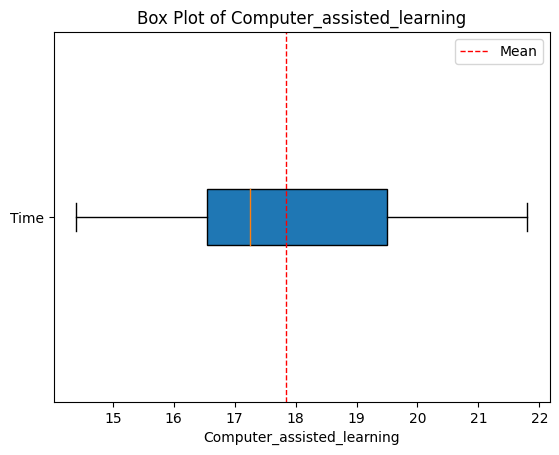

Classes:
   Computer_assisted_learning  Frequency
0                     16.2500          3
1                     18.1000          4
2                     19.9500          3
3                     21.8000          2 



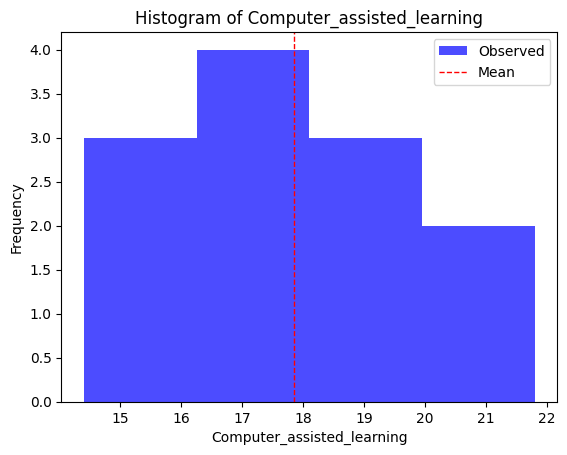

Chi-Square Table:
       χ^2
0   0.0003
1   0.0599
2   0.0220
3   0.0651
Sum 0.1472
Number of classes (bins) using Sturges' formula: 4
Chi-square Statistic: 0.1472239976217754, p-value: 0.7344875091431478


<ipython-input-14-c963d1102d24>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.2475,0.2475,2.9699
1,0.5425,0.2950,3.5396
2,0.8148,0.2723,3.2679
3,0.9540,0.1392,1.6703
4,Sum =,0.9540,12.0000


In [14]:
### normality test
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


Computer_assisted_learning = data['Computer_assisted learning']

# Using describe() to get most of the descriptive statistics
desc_stats = Computer_assisted_learning.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = Computer_assisted_learning.quantile(0.25)
Q3 = Computer_assisted_learning.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(Computer_assisted_learning)
std_dev = np.std(Computer_assisted_learning, ddof=1)

# Calculate Sturges' number of bins
n = len(Computer_assisted_learning)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(Computer_assisted_learning)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(Computer_assisted_learning, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)


# Box plot
plt.boxplot(Computer_assisted_learning, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Computer_assisted_learning')
plt.xlabel('Computer_assisted_learning')
plt.yticks([1], ['Time'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Computer_assisted_learning': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Computer_assisted_learning=hist_df.Computer_assisted_learning+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(Computer_assisted_learning, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Computer_assisted_learning')
plt.xlabel('Computer_assisted_learning')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

count   12.0000
mean    20.2167
std      4.4206
min     13.8000
25%     17.7750
50%     19.0000
75%     22.3750
max     28.2000
Name: Group_based learning, dtype: float64
Box Plot Values:
Q1: 17.775, Q3: 22.375, IQR: 4.600000000000001
Lower Bound for Outliers: 10.874999999999996
Upper Bound for Outliers: 29.275000000000002

Rounded Number of classes: 4
class Range: 3.5999999999999996


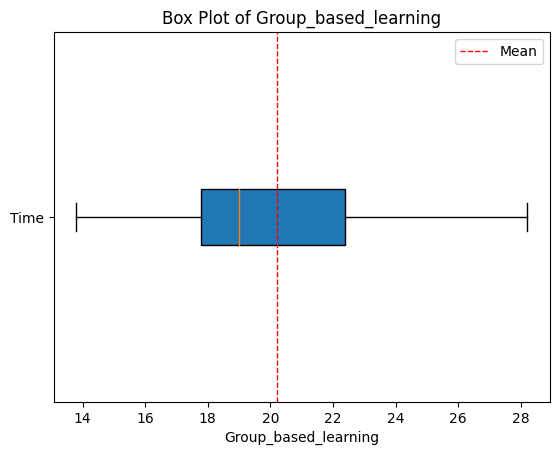

Classes:
   Group_based_learning  Frequency
0               17.4000          3
1               21.0000          5
2               24.6000          2
3               28.2000          2 



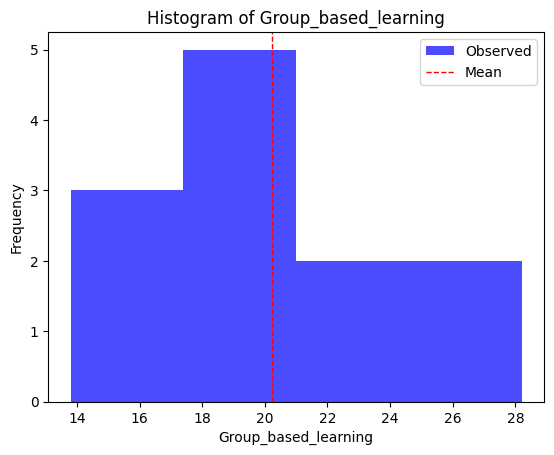

Chi-Square Table:
       χ^2
0   0.0066
1   0.4569
2   0.4670
3   0.1644
Sum 1.0949
Number of classes (bins) using Sturges' formula: 4
Chi-square Statistic: 1.0949045453522597, p-value: 0.3075927431787146


<ipython-input-15-92302a3b4bbc>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.2620,0.2620,3.1441
1,0.5703,0.3083,3.6998
2,0.8393,0.2690,3.2277
3,0.9645,0.1252,1.5029
4,Sum =,0.9645,12.0000


In [15]:
### normality test for Self learning
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


Group_based_learning = data['Group_based learning']

# Using describe() to get most of the descriptive statistics
desc_stats = Group_based_learning.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = Group_based_learning.quantile(0.25)
Q3 = Group_based_learning.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(Group_based_learning )
std_dev = np.std(Group_based_learning, ddof=1)

# Calculate Sturges' number of bins
n = len(Group_based_learning )
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(Group_based_learning)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(Group_based_learning, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)


# Box plot
plt.boxplot(Group_based_learning, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Group_based_learning')
plt.xlabel('Group_based_learning')
plt.yticks([1], ['Time'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Group_based_learning': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Group_based_learning = hist_df.Group_based_learning+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(Group_based_learning, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Group_based_learning')
plt.xlabel('Group_based_learning')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

In [20]:
import scipy.stats as st

# 计算上限值和下限值
upper_limit = 44 + 2.5
lower_limit = 44 - 2.5

# 计算超出上限值和下限值的概率
probability_outside = st.norm.cdf(lower_limit, loc=44, scale=0.100) + (1 - st.norm.cdf(upper_limit, loc=44, scale=0.100))

# 计算落在规范范围之外的比例
proportion_outside = 1 - probability_outside

# 打印结果
print("Proportion of springs outside the specification:", proportion_outside)


Proportion of springs outside the specification: 1.0


In [16]:
import scipy.stats as st

t_value = (44.175 - 44) / (1.017 ** 0.5) / 10
p_value = 2 * (1 - st.t.cdf(abs(t_value), 99))

print(p_value)

0.9861898329200964


In [13]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt
print(f't=6.965且自由度为2的单尾检验对应的p值为{t.sf(6.965,2)}')
print(f't=6.965且自由度为2的双尾检验对应的p值为{2*t.sf(6.965,2)}')

t=6.965且自由度为2的单尾检验对应的p值为0.009998765127525556
t=6.965且自由度为2的双尾检验对应的p值为0.01999753025505111


In [17]:
print(f't=t_value且自由度为99的双尾检验对应的p值为{2*t.sf(t_value,99)}')

t=t_value且自由度为99的双尾检验对应的p值为0.9861898329200967


In [18]:
t_value2 = 2.5 / (1.017 ** 0.5) / 10
print(f't=value2且自由度为99的双尾检验对应的p值为{2*t.sf(t_value2,99)}')

t=value2且自由度为99的双尾检验对应的p值为0.8047239051121469
